# <center> Экзамен по "Науке о данных" </center>

## Пешков Максим
## БЭК 181

Время выполнения заданий - 3 часа (11:00 - 14:00). 

Экзамен включает 3 обязательных задания для получения максимальной оценки (100 баллов) и 30 бонусных баллов.

До 14:00 необходимо сдать задание на Github Classroom в формате .ipynb, указав имя, фамилию и группу в названии файла, и загрузить свой код по каждой задаче на Яндекс.Контест https://contest.yandex.ru/contest/18973/enter для проверки на плагитат. 

Уточнения условия, если они будут, появятся по ссылке https://www.overleaf.com/read/kbwtcskdtbbv, в телеграм канале @room112, и в чате «Науки о данных».


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import time
from tqdm import tqdm_notebook as tqdm
from scipy.optimize import minimize
import scipy.stats as stats
from scipy.stats.stats import pearsonr
from scipy.stats import kstest
from scipy.optimize import minimize

### Задача про блуждание (35 баллов)

Шерлок Холмс расследует дело о пропаже бюллетеней на избирательном участке. Ватсон заметил, что всегда во время своих размышлений Холмс ходит ровно по прямой. Предположим, что в начале движения Шерлок находится в точке с координатой $0$. В каждый момент времени его координата изменяется на $\Delta x$ метров, где $\Delta x$ — случайная величина, имеющая стандартное нормальное распределение. Эта величина прибавляется к текущей координате после каждого шага и может принимать положительные и отрицательные значения.

1. Постройте график изменения положения Шерлока (его координаты на прямой) за $1000$ шагов. По горизонтали – количество пройденных шагов, по вертикали – положение Шерлока.[**5 баллов**]

2. Постройте для траектории положения Шерлока из предыдущего пункта график изменения выборочного среднего и дисперсии для $\Delta x$. По горизонтали – количество шагов, по вертикали – значения выборочного среднего и выборочной дисперсии. [**10 баллов**]

3. Проведите $10^3$ экспериментов по 500 шагов. Продемонстрируйте на одном графике $15$ случайных траекторий из проведенных экспериментов. [**10 баллов**]

4. Добавьте на график из предыдущего пункта усредненную по всем экспериментам траекторию выборочной дисперсии для каждого шага. [**10 баллов**]

### 1.

In [2]:
np.random.seed(24)
path = np.random.normal(size=1000)
all_path = np.cumsum(path)

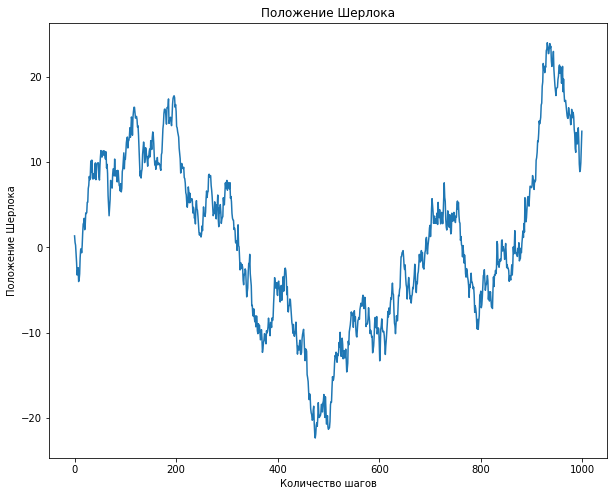

In [3]:
fig, ax = plt.subplots(figsize = (10,8))
plt.plot(all_path)
plt.xlabel('Количество шагов')
plt.ylabel('Положение Шерлока')
plt.title('Положение Шерлока');

### 2.

In [4]:
var = []
mean = []
for i in range(1, len(all_path)):
    var.append(np.var(path[:i+1]))
    mean.append(np.mean(path[:i+1]))

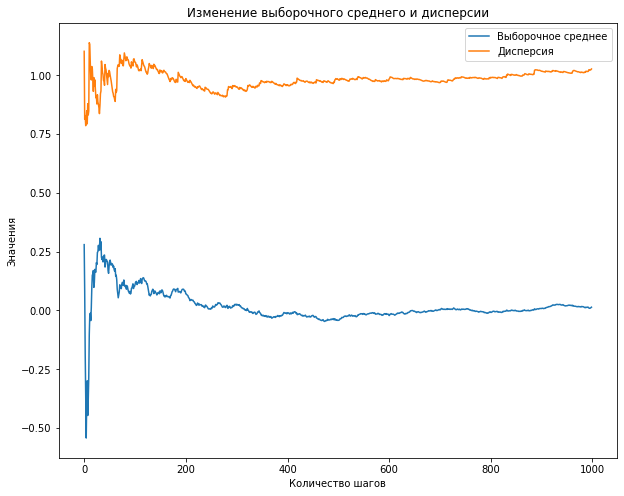

In [5]:
fig, ax = plt.subplots(figsize = (10,8))
plt.plot(mean, label = 'Выборочное среднее')
plt.plot(var, label = 'Дисперсия')
plt.legend()
plt.xlabel('Количество шагов')
plt.ylabel('Значения')
plt.title('Изменение выборочного среднего и дисперсии');

### 3.

In [6]:
np.random.seed(24)
many_path = []
for _ in range(1000):
    p = np.cumsum(np.random.normal(size=500))
    many_path.append(p)

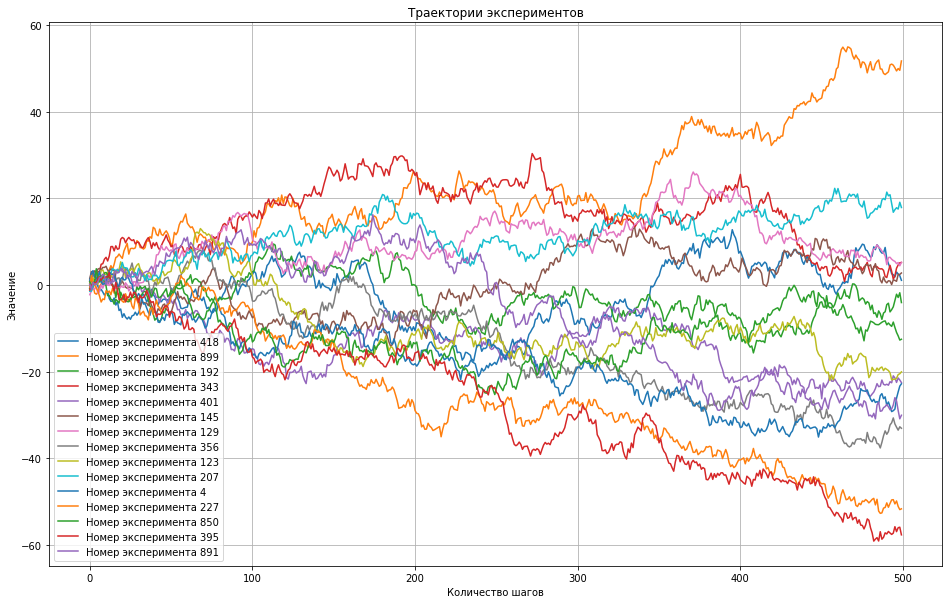

In [7]:
np.random.seed(24)
fig, ax = plt.subplots(figsize = (16,10))
for i in range(15):
    index = np.random.randint(0, 1000)
    plt.plot(many_path[index], label = 'Номер эксперимента {:}'.format(index))
ax.grid()
plt.legend()
plt.xlabel('Количество шагов')
plt.ylabel('Значение')
plt.title('Траектории экспериментов');

### 4.

In [8]:
np.random.seed(24)
mean_var = []
for _ in range(1000):
    p = np.random.normal(size=500)
    variance = []
    for i in range(len(p)):
        variance.append(np.var(p[:i+1]))
    mean_var.append(variance)

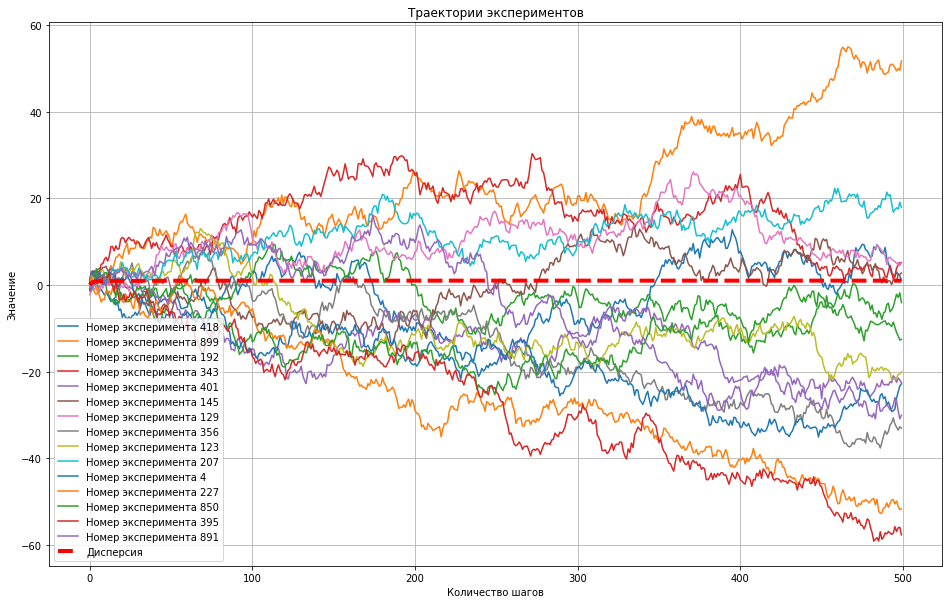

In [9]:
all_var = np.mean(np.array(mean_var), axis=0)
np.random.seed(24)
fig, ax = plt.subplots(figsize = (16,10))
for i in range(15):
    index = np.random.randint(0, 1000)
    plt.plot(many_path[index], label = 'Номер эксперимента {:}'.format(index))
plt.plot(all_var, 'r--', label ='Дисперсия', linewidth=4)
ax.grid()
plt.legend()
plt.xlabel('Количество шагов')
plt.ylabel('Значение')
plt.title('Траектории экспериментов');

### Парковки от мэра (40 баллов + 15 бонусных баллов)

Перед выборами в центре города открыли неразмеченную парковку длиной $100$ метров. Каждый приезжающий водитель случайным образом выбирает место длиной $2$ метра, и если место оказалось свободным, встает на парковку до конца дня. Если он не помещается в выбранный отрезок, то водитель в нервном состоянии уезжает с парковки. За один день на парковку пытается встать $1000$ проезжающих мимо водителей. Для выполнения всех пунктов заданий проведите $2000$ симуляций. 

*Hint: Для простоты будем считать, что выбор точки на парковке - это центр машины.*

1. В среднем сколько машин оказываются припаркованы к концу дня? [**20 баллов**]

2. Постройте $95$\%-ый доверительный интервал для ожидаемого количества машин припаркованных к концу дня. [**10 баллов**]

3. Постройте $95$\%-ый доверительный интервал для ожидаемого количества свободного места на парковке к концу дня (в метрах). [**10 баллов**]

4. После возникшего хаоса на парковку добавили регулярную разметку для мест длиной $2$ метра, но водители разделились на два лагеря — тех, кто соблюдает и не соблюдает правила разметки. С вероятностью $p$ приезжает честный водитель и занимает случайное свободное место строго по разметке. Водители второго лагеря паркуются, как раньше. Нарисуйте график, где по оси ординат – процент честных водителей, а по оси абсцисс – процент свободного места на парковке к концу дню для вероятностей $p$ равным от $0$ до $1$ с шагом в $5$\%. Для каждого порога вероятности проведите по $500$ симуляций. [**15 бонусных баллов**]

### 1.

In [10]:
np.random.seed(24)
numbers = []
for _ in range(2000):
    cars = np.random.uniform(low = 1, high = 99, size = 1000)
    park = [cars[0]]
    for i in range(1, 1000):
        if min(np.abs(cars[i]-park)) >= 2:
            park.append(cars[i])
    numbers.append(len(park))

In [11]:
print('Среднее количество машин', np.array(numbers).mean())

Среднее количество машин 36.3135


### 2.

In [12]:
mean = np.mean(numbers)
var = np.var(numbers)
alpha = 0.95

qt = stats.t.ppf(alpha + (1 - alpha)/2, 1999)
sd = np.sqrt(var)

left = mean - qt * sd / np.sqrt(2000)
right = mean + qt * sd / np.sqrt(2000)

print('Доверительный интервал: ({:}, {:})'.format(round(left, 3), round(right, 3)))

Доверительный интервал: (36.253, 36.374)


### 3.

In [13]:
free = np.ones(2000)*100 - np.dot(numbers, 2)

In [14]:
mean = np.mean(free)
var = np.var(free)
alpha = 0.95

qt = stats.t.ppf(alpha + (1 - alpha)/2, 1999)
sd = np.sqrt(var)

left = mean - qt * sd / np.sqrt(2000)
right = mean + qt * sd / np.sqrt(2000)

print('Доверительный интервал: ({:}, {:})'.format(round(left, 3), round(right, 3)))

Доверительный интервал: (27.252, 27.494)


### Правдоподобие счастья (25 баллов + 15 бонусных баллов)

Загрузите набор данных по измерению уровня счастья в разных странах мира за 2019 год (**data.csv** в репозитории экзамена). Полное описание датасета доступно по ссылке на Kaggle: https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

1. Постройте на графике гистограмму для уровня счастья (переменная Score) и ее функции плотности. Является ли распределение нормальным? [**5 баллов**]

2. Пусть уровень счастья – целевая вещественная переменная $y$, все $y_i$ независимы и нормальны $N(\mu, \sigma^2)$, где $\mu = a + b*x_i$. Выведите функцию правдоподобия и задачу для оптимизации поиска коэффициентов $a$, $b$ и $\sigma^2$. [**15 бонусных баллов**]

3. Оцените параметры с помощью метода максимального правдоподобия, если в роли $x_i$ выступает ВВП на душу населения (GDP per capita). [**10 баллов**]

4. Используя оценённые параметры и медианное значение ВВП на душу населения, оцените вероятность того, что уровень счастья будет больше 5.
[**10 баллов**]

In [15]:
data = pd.read_csv('data.csv')

In [16]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### 1.

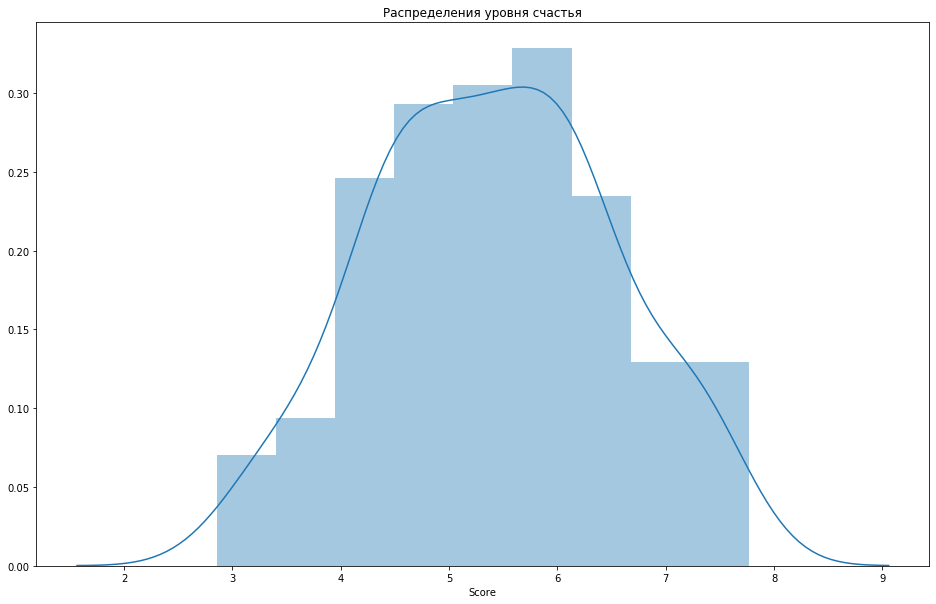

In [17]:
fig, ax = plt.subplots(figsize = (16,10))
sns.distplot(data['Score'], ax=ax)
plt.title('Распределения уровня счастья');

In [18]:
stats.kstest(data['Score'], 'norm', (data['Score'].mean(), data['Score'].var()))

KstestResult(statistic=0.04703509708131881, pvalue=0.8804284524308729)

P-value в тесте Колмогорова равна 0.88, значит, для любого разумного уровня значимости гипотеза о нормальном распределении не отвергается

### 2.

In [19]:
def minus_lklh(theta, x, y):
    a, b, sigma2 = theta # распакуем параметры для читабельности
    mu = a + b * x
    n = len(x)
    s2 = np.exp(sigma2)
    lklh = -np.log(np.sqrt(2 * np.pi * s2)) - 0.5 * ((y - mu) ** 2) / s2
    log = np.sum(lklh)
    return -log

#optim_res = minimize(minus_lklh, theta_init, data, x)
#optim_res.x

### 3.

In [20]:
theta_init = [1, 1, 1]
x = data['GDP per capita']
y = data['Score']

optim_res = minimize(minus_lklh, theta_init, args = (x, y))
print('Оценка параметров a, b, sigma^2:', optim_res.x[0], optim_res.x[1], np.exp(optim_res.x[2]))

Оценка параметров a, b, sigma^2: 3.3993451016863374 2.21814804984958 0.4551967466623702
